### Here we will simulate the A/B tests over a new description on a course overview page of an online EdTech company, to dedicate larger portions to connecting concepts to career skills and less details on each concept.

***This test will deal with multiple metrics to analyze -- `Enrollment Rate`, `Avg Reading time`, `Avg. Classroom time` and `Completion Rate`.***

Firstly, we will analyze each of them separately and then combine all to draw the conclusions.

#### 1. Enrollment Rate

In [1]:
# Import necessary libraries and read the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(42)

course_page = pd.read_csv('./data/course_page_actions.csv')
course_page.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [2]:
# Get dataframe with all records from control group
control_df = course_page.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()

# Display click through rate
control_ctr

0.2364438839848676

In [3]:
# Get dataframe with all records from experiment group
experiment_df = course_page.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

# Display click through rate
experiment_ctr

0.2668693009118541

In [4]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference
obs_diff

0.030425416926986526

In [5]:
# Now create a sampling distribution of the difference in proportions
# with bootstrapping

samp_diffs = []

for _ in range(10000):
    samp_df = course_page.sample(course_page.shape[0], replace = True)
    samp_control_df = samp_df.query('group == "control"')
    samp_control_ctr = samp_control_df.query('action == "enroll"').id.nunique() / samp_control_df.query('action == "view"').id.nunique()
    samp_exp_df = samp_df.query('group == "experiment"')
    samp_exp_ctr = samp_exp_df.query('action == "enroll"').id.nunique() / samp_exp_df.query('action == "view"').id.nunique()
    samp_diffs.append(samp_exp_ctr - samp_control_ctr)
    
samp_diff_mean = np.mean(samp_diffs)
samp_diff_mean

0.030160746635366387

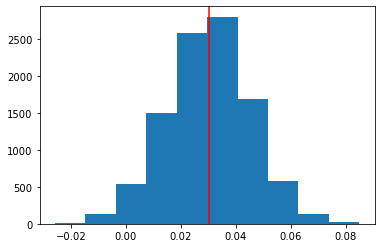

In [7]:
# Plot the sampling distribution and mark the observed difference with a line to cross check whether sampling 
# distribution has got the sample difference mean closer to the observed difference

plt.hist(samp_diffs);
plt.axvline(x = obs_diff, color = 'r');

Now simulate the Null hypothesis based on a centre of 0 and a spread corresponding to the sampling distribution.

The Null Hypothesis is the same as that of the [New webpage design](http://localhost:8888/notebooks/Python%20Simulations/Case%20Study%20-%20A_B%20Tests/New%20webpage%20design.ipynb)

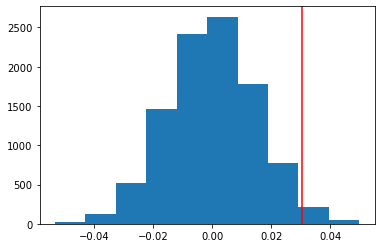

In [9]:
# Simulate distribution under the null hypothesis

null_dist = np.random.normal(0, np.std(samp_diffs), len(samp_diffs))

# Plot the null distribution and include a marker for the observed difference or 
# mean difference as per sampling distribution (They both are nearly the same though, due to the "Law of Large Numbers")

plt.hist(null_dist);
plt.axvline(x = obs_diff, color = 'r');

In [10]:
# Compute p-value

p_val = (null_dist > obs_diff).mean()
p_val

0.0218

#### 2. Average Classroom time

Here we will test whether the Average classroom time spent for experiment is more than that of the Control

In [11]:
# Necessary libraries have been imported already, read the csv dataset here

class_time = pd.read_csv('./data/classroom_actions.csv')
class_time.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [12]:
# The total_days represents the total amount of time
# each student has spent in classroom.
# get the average classroom time for control group
control_mean = class_time.query('group == "control"').total_days.mean()

# get the average classroom time for experiment group
experiment_mean = class_time.query('group == "experiment"').total_days.mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.36899038461539, 74.6715935334873)

In [13]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

In [14]:
# create sampling distribution of difference in average classroom times
# with boostrapping

samp_diffs = []
for _ in range(10000):
    samp_class_time = class_time.sample(class_time.shape[0], replace = True)
    samp_control_mean = samp_class_time.query('group == "control"').total_days.mean()
    samp_expt_mean = samp_class_time.query('group == "experiment"').total_days.mean()
    samp_diffs.append(samp_expt_mean - samp_control_mean)
    
samp_diffs_mean = np.mean(samp_diffs)
samp_diffs_mean

1.2951203373382187

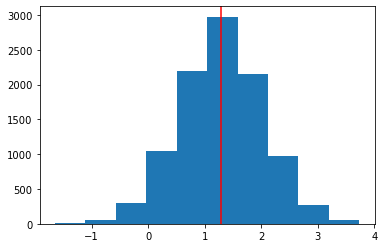

In [16]:
# plot sampling distribution and inlude a line marking the sampling dist mean

plt.hist(samp_diffs);
plt.axvline(x = samp_diffs_mean, color = 'r');

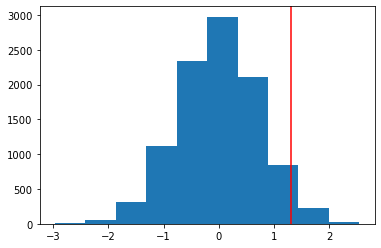

In [17]:
# simulate distribution under the null hypothesis and plot the same along with a marker for the observed diff.

null_dist_class = np.random.normal(0, np.std(samp_diffs), len(samp_diffs))

plt.hist(null_dist_class);
plt.axvline(x = obs_diff, color = 'r');

In [18]:
# compute the p-value

p_value = (null_dist_class > obs_diff).mean()
p_value

0.0378

#### 3. Completion Rate

Here we will test whether the Completion rate for the experiment is more than that of the control

In [19]:
# Necessary libraries have been imported already, read the csv dataset here

comp_rate = pd.read_csv('./data/classroom_actions.csv')
comp_rate.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [33]:
# Create dataframe with all control records
control_df = comp_rate.query('group == "control"')

# Compute completion rate
control_ctr = control_df.completed.mean()

# Display completion rate
control_ctr

0.3719951923076923

In [34]:
# Create dataframe with all experiment records
experiment_df = comp_rate.query('group == "experiment"')

# Compute completion rate
experiment_ctr = experiment_df.completed.mean()

# Display completion rate
experiment_ctr

0.3935334872979215

In [35]:
# Compute observed difference in completion rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [23]:
# Create sampling distribution for difference in completion rates
# with boostrapping

comp_rate_diffs = []

for _ in range(10000):
    samp_comp_rate = comp_rate.sample(comp_rate.shape[0], replace = True)
    samp_cont_ctr = samp_comp_rate.query('group == "control"').completed.mean()
    samp_expt_ctr = samp_comp_rate.query('group == "experiment"').completed.mean()
    comp_rate_diffs.append(samp_expt_ctr - samp_cont_ctr)
    
comp_rate_diffs_mean = np.mean(comp_rate_diffs)
comp_rate_diffs_mean

0.021648228284006695

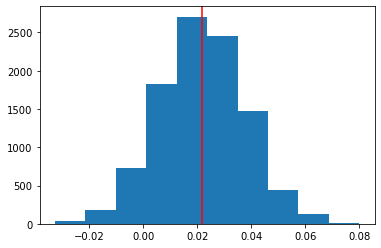

In [37]:
# plot the sampling distribution along with a line marker for the sample diff mean

plt.hist(comp_rate_diffs);
plt.axvline(x = comp_rate_diffs_mean, color = 'r');

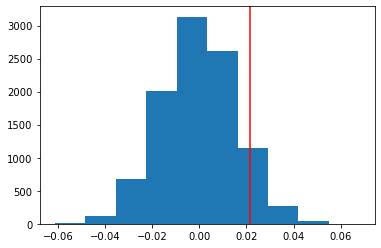

In [38]:
# Simulate the distribution under the null hypothesis and plot the same with a line marking the observed diff or
# sampling dist diff mean (since they both a pretty close due to the Law of Large Numbers)

null_vals = np.random.normal(0, np.std(comp_rate_diffs), len(comp_rate_diffs))

plt.hist(null_vals);
plt.axvline(x = obs_diff, color = 'r');

In [39]:
# compute the p-value

p_value = (null_vals > obs_diff).mean()
p_value

0.0838